<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fdm_euler1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forward Euler Method**

* The history of the **Finite Difference Method (FDM)**
  starts with the Swiss mathematician
  [Leonard Euler (1707-1783)](https://en.wikipedia.org/wiki/Leonhard_Euler).

* Euler devised a simple and brilliant plan for finding
  a numerical solution to the general ordinary differential
  equation  

  $\qquad
  \left\{
  \begin{array}{l}
  y' = F(x,y), \quad a\leq x\leq b
  \\
  y(a) = y_0
  \end{array}\right.
  $  

* Lets divide the closed interval $[a,b]$ to $N$
  equal size sub-intervals  

  $\qquad
  a=x_0, x_1, x_2, \ldots, x_N = b$  

  * That is: $x_i = a+i\Dx$, where $\Dx=\frac{b-a}{N}$.  
  * Notice that we get $N+1$ **nodes** $x_i$, $i=0,1,2,\ldots,N$.

* Assuming that $y(x)$ is a solution to our equation,
  we define the nodes on the $y$-axis by $y_i = y(x_i)$

* The first order derivative $y'(x)$ can be approximated
  on our nodes $x_i$ by the formula  

  $\qquad\displaystyle
  y'(x_i) = \frac{y(x_i + \Dx) - y(x_i)}{\Dx} = \frac{y_{i+1} - y_i}{\Dx}
  $

* So, the discrete form of our equation is

  $\qquad\displaystyle
  \frac{y_{i+1} - y_i}{\Dx} = F(x_i,y_i)
  $

* We get Euler's recursive solution:  

  $\qquad\displaystyle
  \fbox{$y_{i+1} = y_i + F(x_i,y_i)\Dx$}
  $  

  $y_0$ is given as an initial condition, so
  we can easily compute all the nodes $y_i$!

* **Practically, this allows us to solve (numerically)
  any first order ordinary differential equation!**




# Example
* We show how to find a numerical solution to
  the ordinary differential equation

  $\qquad
  \left\{
  \begin{array}{l}
  y' = 3x^2(y+1), \quad 0\leq x\leq 2
  \\
  y(0) =1
  \end{array}\right.
  \newcommand{\Dx}{\Delta x}
  \newcommand{\Dy}{\Delta y}
  \newcommand{\Dz}{\Delta z}
  \newcommand{\Dt}{\Delta t}
  \newcommand{\Ds}{\Delta s}
  \newcommand{\Du}{\Delta u}
  \newcommand{\U}{\mathbf{U}}
  \renewcommand{\V}{\mathbf{V}}
  $  
* Here we have $F(x,y) = 3x^2(y+1)$.

* By the **forward Euler method**

  $\qquad\displaystyle
  y_{i+1} = y_i + F(x_i, y_i) \Dx
  $

* Our interval $[0,2]$ is divided to $n$ equal subintervals
  $x_i = 2/n$.

* The array $y_i$ is obtained by the recursive formula
  above.

In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip
from fdmtools import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


* First we define our grid parameters.
* For a start we use a small division size $N=100$.

In [2]:
a = 0                   # Interval = [0,2]
b = 2
N = 100                 # Division size = 100
dx = (b-a)/N            # x-axis grid step
X = np.array([a + i*dx for i in range(N+1)])  # N+1 x-nodes array
Y = np.zeros(N+1)       # y-nodes array (all initialized to zero)

* This is the **Euler Forward Method** for solving our equation!
* Notice how our right side function $F(x,y) = 3x^2(y+1)$
  is represented in a discrete form
  (as a Python **lambda** function).

In [3]:
Y[0] = 0                               # initial condition y(0) = 0
F = lambda i: 3*X[i]**2 * (Y[i] + 1)   # this is our F from: y' = F(x,y)
for i in range(0, N):
    Y[i+1] = Y[i] + F(i)*dx

* Took us 4 lines of code to solve the problem!
* To be sure, lets plot the graph of the array **Y**

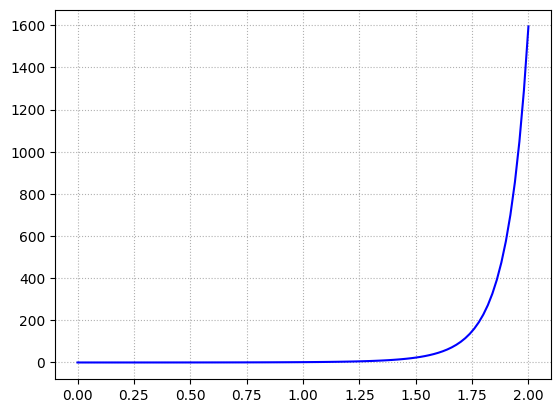

In [4]:
plt.plot(X, Y, color="blue", linewidth=1.5)

* The real solution to this problem is $y(x) = e^{x^3} - 1$.
* Lets plot it using matplotlib.

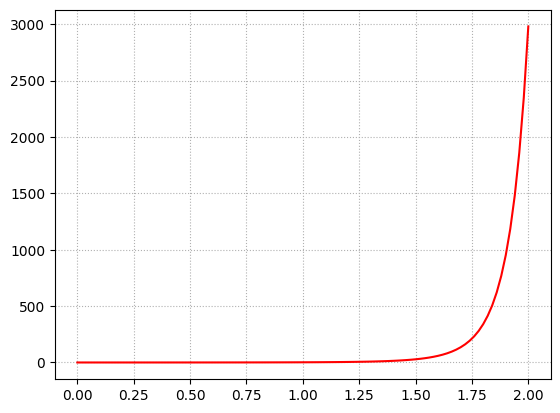

In [5]:
Yreal = np.exp(X**3) - 1    # The real solution of the equation
plt.plot(X, Yreal, color="red", linewidth=1.5)

* The graphs look very similar up to $x=1.5$, but diverge sharply
  at the interval $[1.5,2.0]$.
* At the right end ($x=2.0$) we
  notice a very sharp deviation from 1600 to 3000!

* To get a better comparison between the graphs,
  we should draw them together on the same axis.

* We will use a blue line for the numerical solution, and dashed red
  line for the real solution.

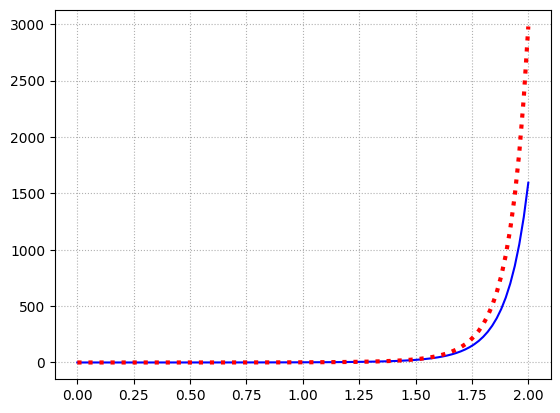

In [6]:
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.plot(X, Yreal, color="red", linewidth=3.0, linestyle=':')

* The graphs look identical on the interval $[0,1.5]$,
  but significantly diverge
  on the interval $[1.5,2.0]$.
* We can perform a more precise numerical check:

Max err = 1385.973819800836


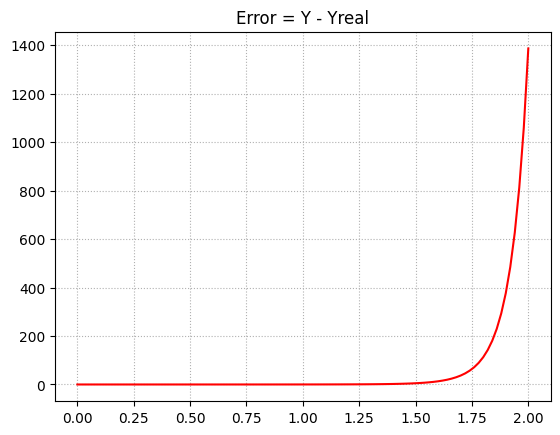

In [7]:
Yreal = np.exp(X**3) - 1          # The real solution
E = np.abs(Y - Yreal)             # The real error (absolute value)
print(f"Max err = {E.max()}")

plt.title("Error = Y - Yreal")
plt.plot(X, E, color="red", linewidth=1.5);

* Looks like the error is very small on the interval $[0,1.75]$,
  and getting larger when we're getting close to $x=2.0$.

* However, the values in this area are very high ($y(x)=e^{x^3} - 1$)
  so we need to divide the error by $y(x)$, to get a **relative error**.

Max relative err = 0.465098442940373


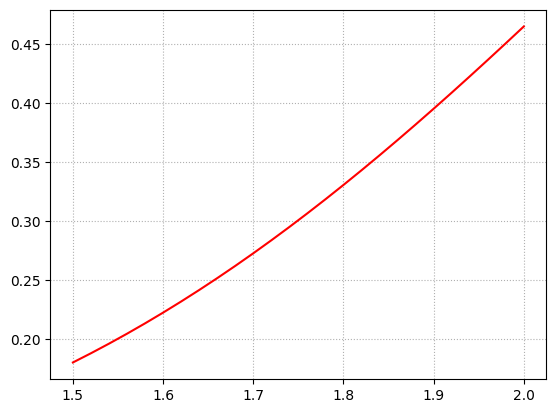

In [8]:
i = int(1.5/dx)                              # Index of x=1.5
E = np.abs((Y[i:] - Yreal[i:])/Yreal[i:])    # Relative error in the interval [1.5,2.0]
print(f"Max relative err = {E.max()}")       # Max error in the interval [1.5,2.0]

plt.plot(X[i:], E, color="red", linewidth=1.5)

* The relative error near near $x=2.0$ is around 46%!
* So we may need to use a larger division number like $N=10000$?
* Lets first try $N=5000$.

Max err = 41.11292546162258


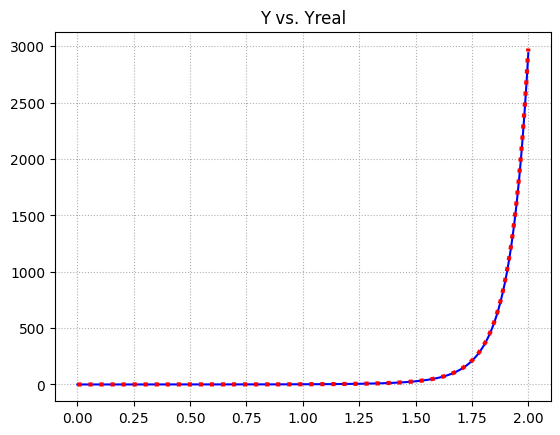

In [9]:
N = 5000
dx = (b-a)/N
Y = np.zeros(N+1)             # Array for the FDM solution
Y[0] = 0                      # initial condition y(0) = 0
X = np.array([a + i*dx for i in range(N+1)])
for i in range(0, N):
    Y[i+1] = Y[i] + F(i) * dx

Yreal = np.exp(X**3) - 1      # The real solution
E = np.abs(Y - Yreal)         # The real (absolute) error
print(f"Max err = {E.max()}")

plt.title("Y vs. Yreal")
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.plot(X, Yreal, color="red", linewidth=3.0, linestyle=':')

* This time it looks as if the numerical solution **Y** overlaps
  smoothly with the real solution **Yreal**.

* Lets compute the maximal error.

Max relative err = 0.013796478218955131


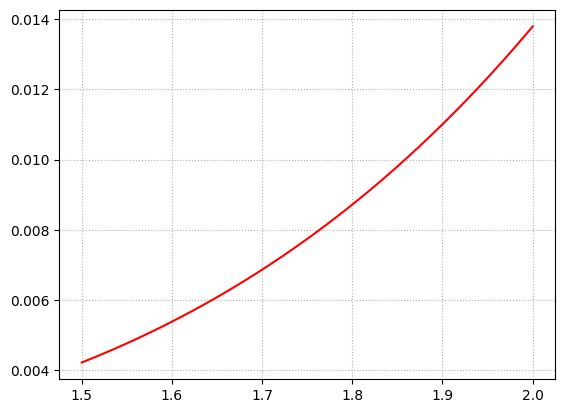

In [10]:
Yreal = np.exp(X**3) - 1
i = int(1.5/dx)                              # Index of x=1.5
E = np.abs((Y[i:] - Yreal[i:])/Yreal[i:])    # Relative error in the interval [1.5,2.0]
print(f"Max relative err = {E.max()}")

plt.plot(X[i:], E, color="red", linewidth=1.5);

* This time the relative error is much smaller 1.4%.
* So changing $N=1000$ to $N=5000$ seems to get us better precision
  near the problematic endpoint $x=2.0$.

* In any case, this process shows that the Euler forward method seems
  to provide a converging solution to our problem.

* Pointwise convergence of the numerical solution to the real
  solution can be found in the following source:  
  http://www.math.ntu.edu.tw/~chern/notes/FD2013.pdf